# Time series

see https://pythondata.com/forecasting-time-series-data-with-prophet-part-2/

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
#from pivottablejs import pivot_ui
import sys
import warnings

warnings.filterwarnings("ignore")
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [5]:
from fbprophet import Prophet

In [6]:
from sqlalchemy import create_engine
from decouple import config

In [7]:
#val = !cat '/home/jovyan/.env'
#db=val[0].split('=')[1];
db=config('DATABASE_URL')

In [8]:
engine = create_engine(db)

In [9]:
sql = '''
SELECT        
--    top 10
	t.Date as ds,
	SUM(t.NetSalesAmt) AS y

FROM            
	BRS_TransactionDW AS t
    
	INNER JOIN BRS_Item AS i 
	ON t.Item = i.Item 

	INNER JOIN BRS_Customer AS c 
	ON t.Shipto = c.ShipTo 


WHERE         
	(i.SalesCategory = 'MERCH') AND 
--    (c.CustGrpWrk = 'Dental Corp') AND
	(t.CalMonth BETWEEN 201701 and 201812) AND
	(1=1)

GROUP BY 
	t.Date

'''

In [10]:
#sql = "select  distinct CustGrpWrk from BRS_Customer where CustGrpWrk like 'Den%' " 

In [11]:
%time df = pd.read_sql_query(sql, engine);

CPU times: user 14.3 ms, sys: 8.51 ms, total: 22.8 ms
Wall time: 26.7 s


In [12]:
df.head

<bound method NDFrame.head of             ds           y
0   2017-01-03  1238037.92
1   2017-01-10  1110695.85
2   2017-01-12  1005820.64
3   2017-01-19   997653.27
4   2017-01-26   830771.08
..         ...         ...
499 2018-11-28  1112440.79
500 2018-12-05  1217060.70
501 2018-12-07   862125.31
502 2018-12-14   737475.48
503 2018-12-21   423401.59

[504 rows x 2 columns]>

In [13]:
df.columns.tolist()

['ds', 'y']

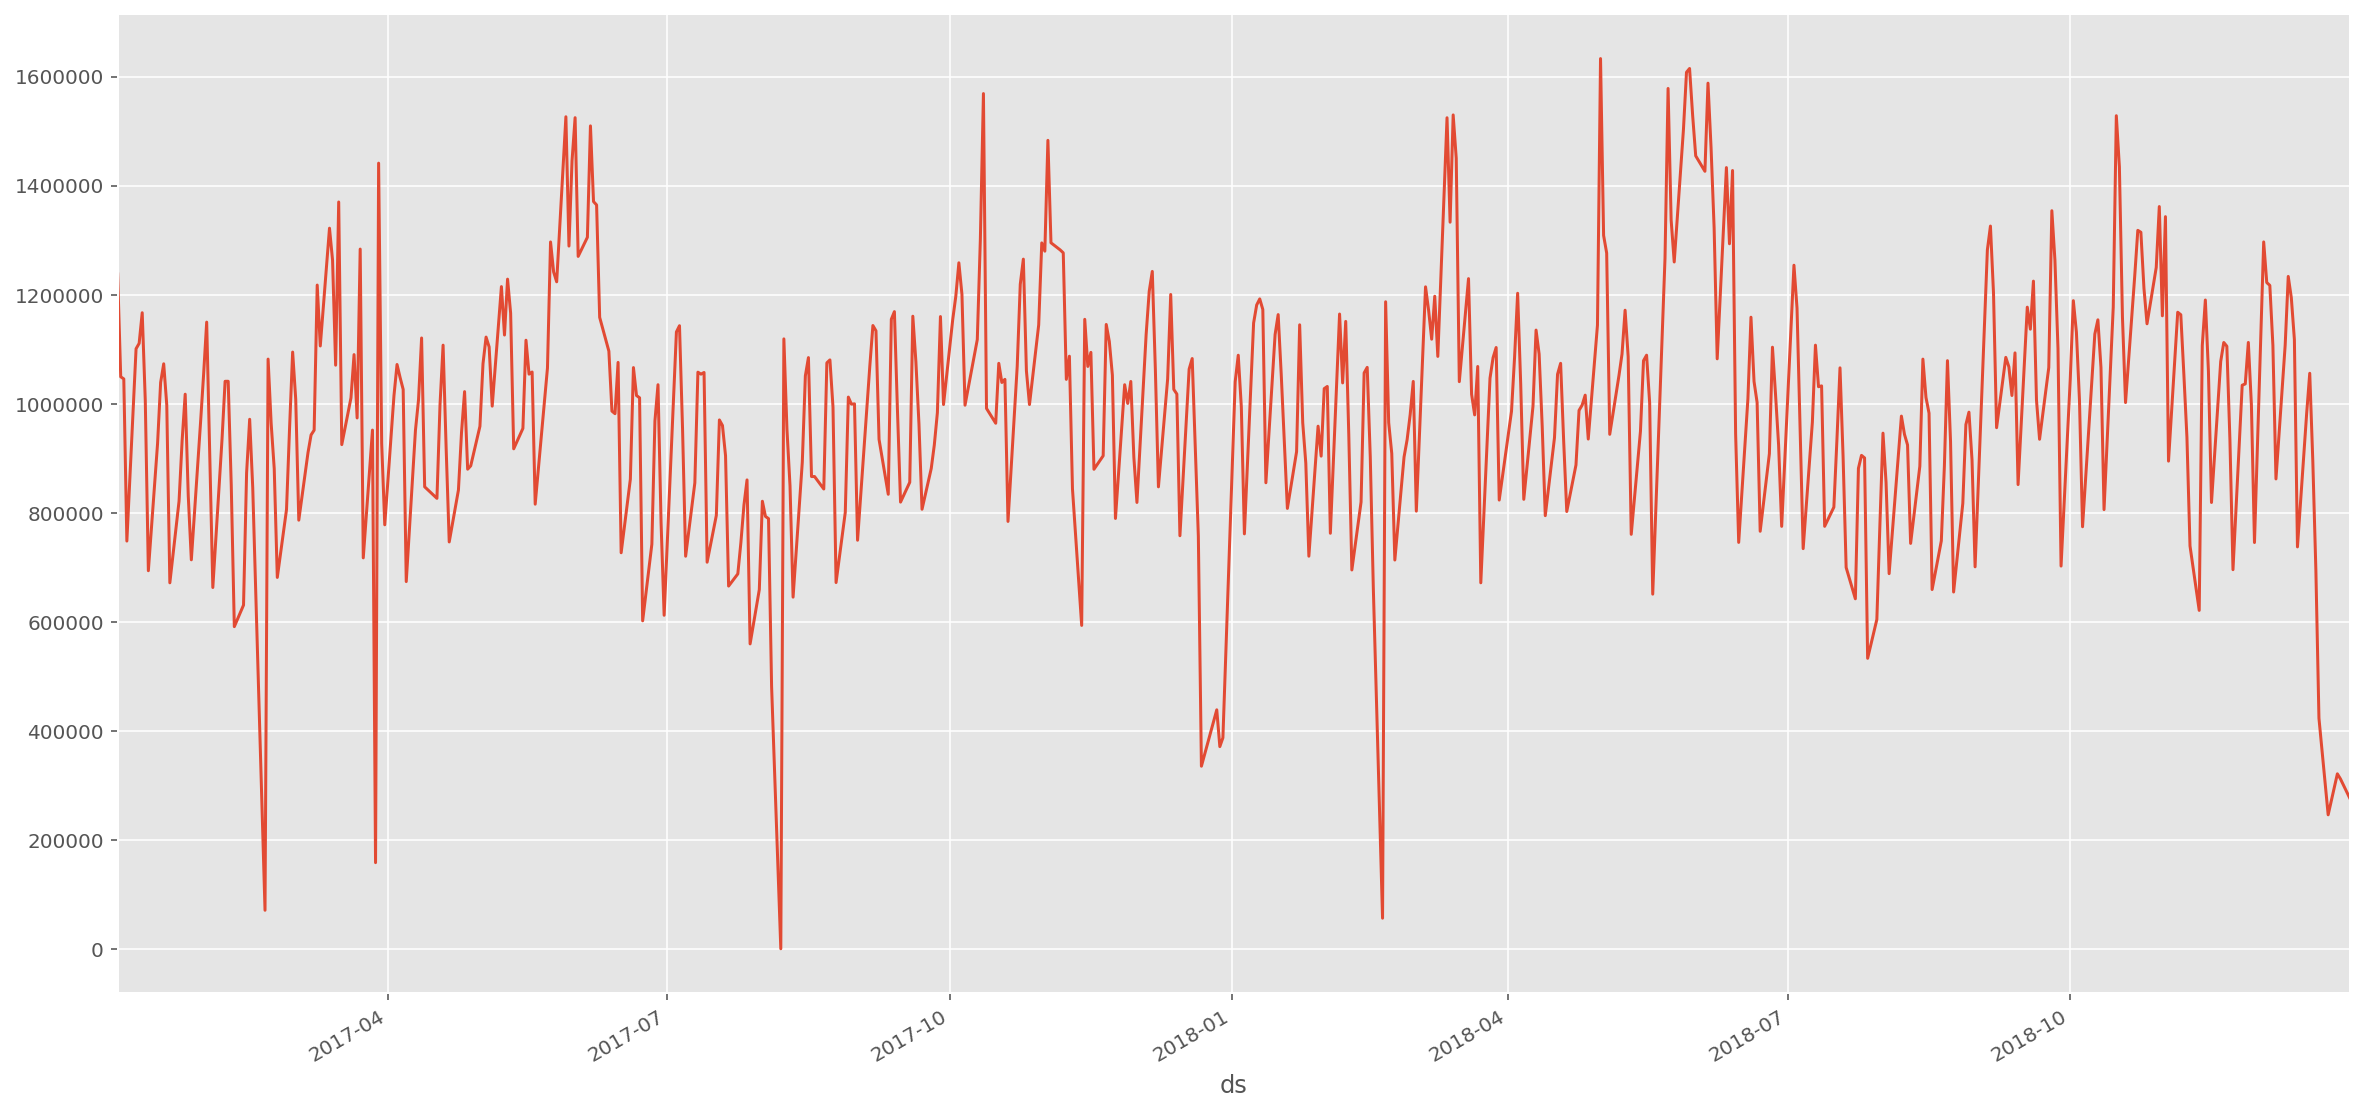

In [14]:
df.set_index('ds').y.plot()


In [15]:
m = Prophet(yearly_seasonality=True);
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
future = m.make_future_dataframe(periods=365)
future.describe()

,ds
count,869
unique,869
top,2017-10-30 00:00:00
freq,1
first,2017-01-03 00:00:00
last,2019-12-31 00:00:00


In [17]:
forecast = m.predict(future)

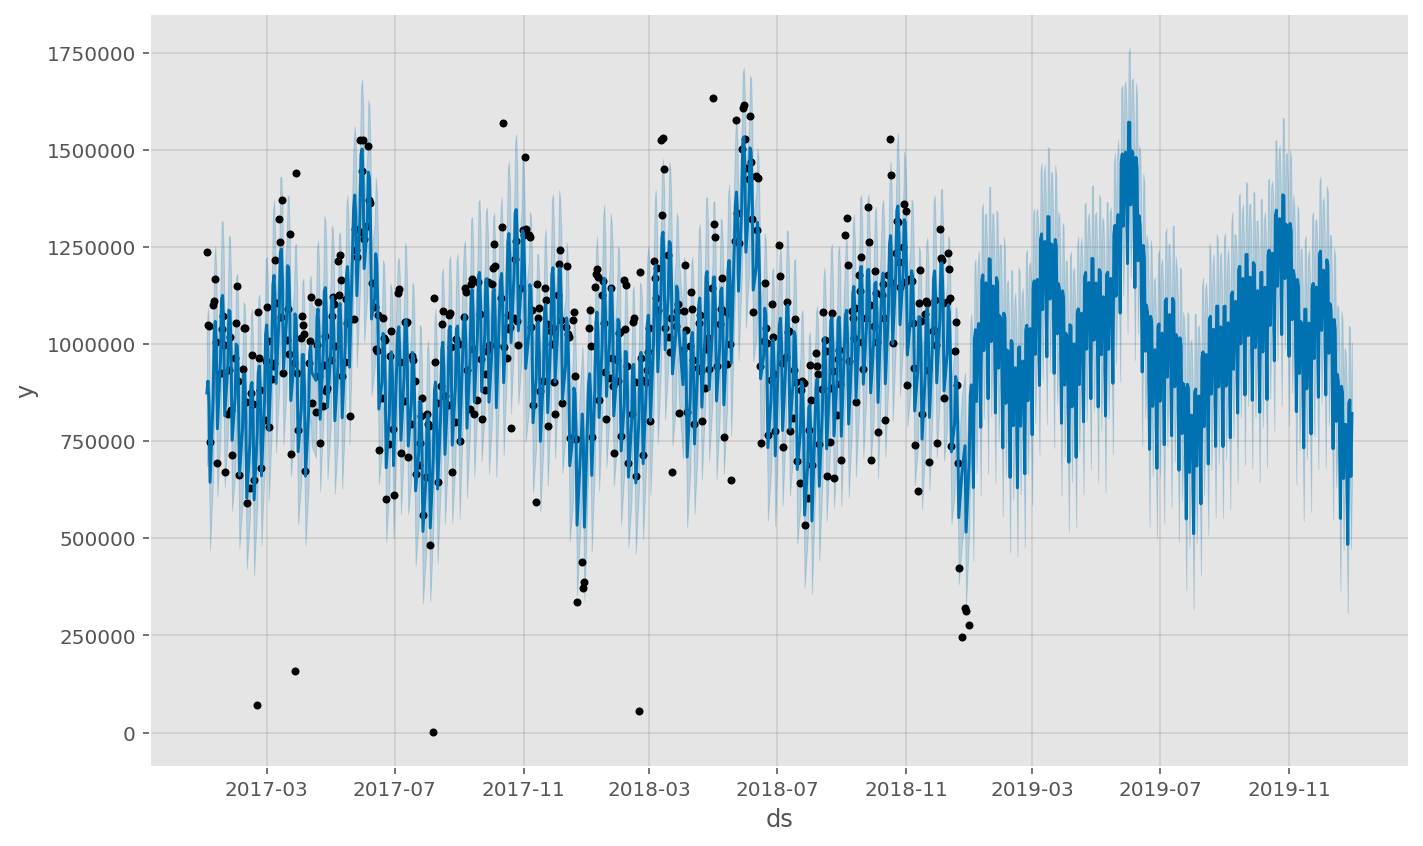

In [18]:
fig1 = m.plot(forecast).savefig('../data/forecast.png');

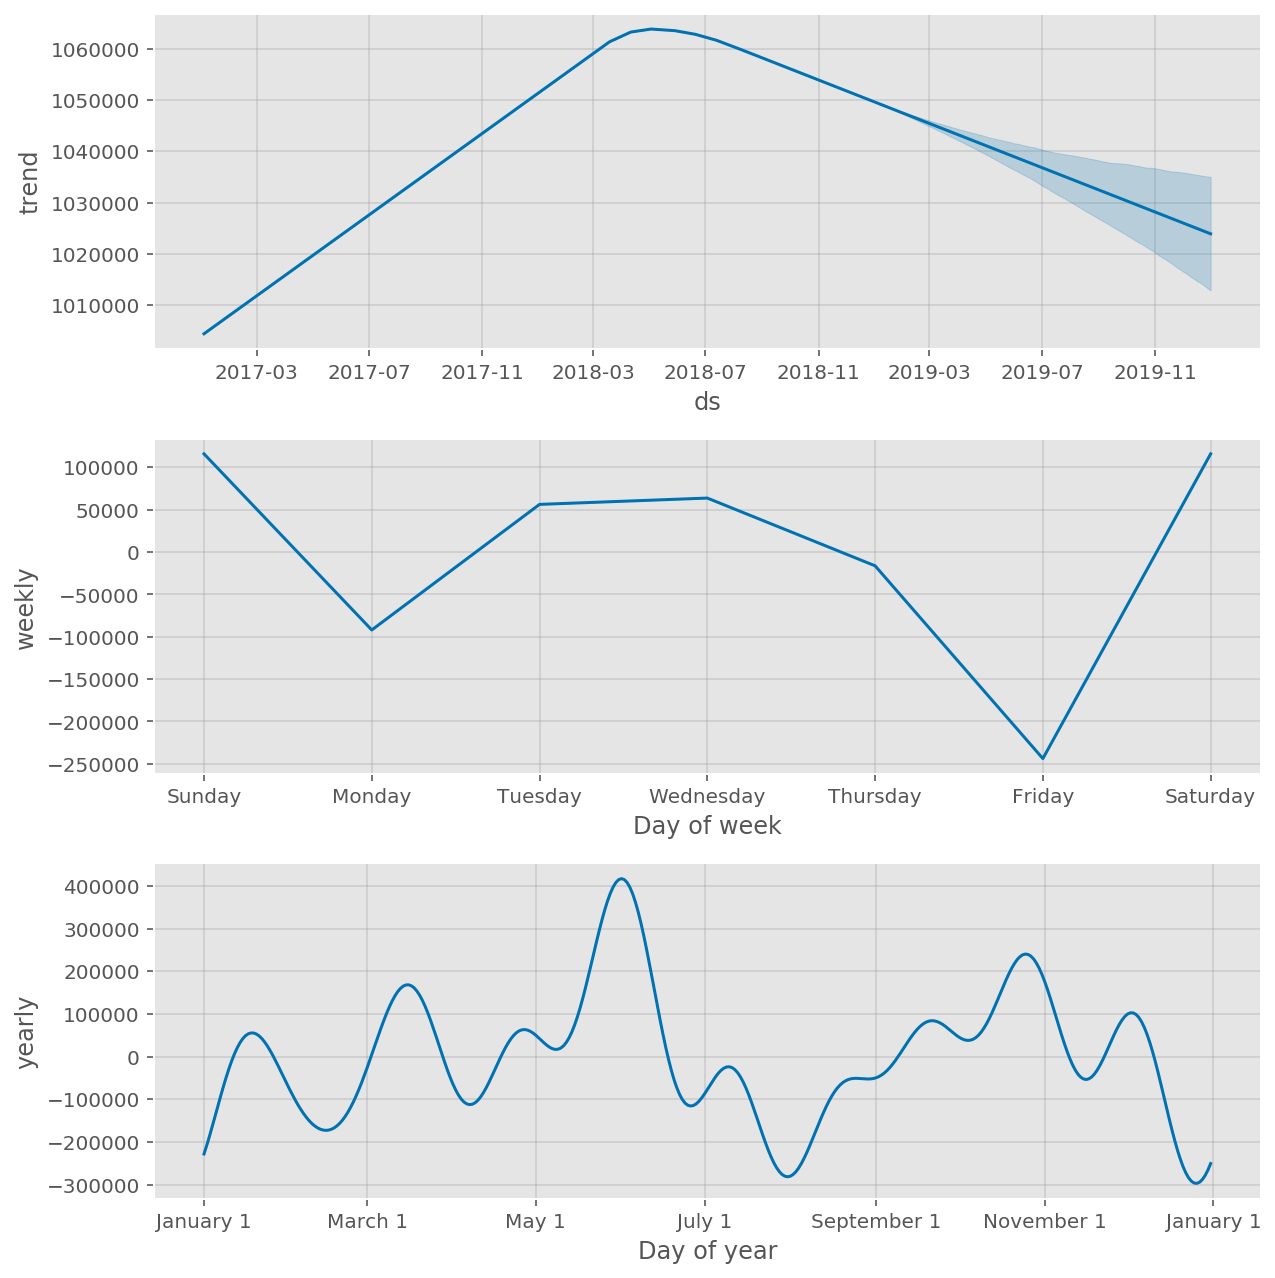

In [19]:
fig2 = m.plot_components(forecast).savefig('../data/comp.png');

In [20]:
from fbprophet.plot import plot_plotly
import plotly.offline as py


ModuleNotFoundError: No module named 'plotly'

In [21]:
py.init_notebook_mode(connected=True)
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

NameError: name 'py' is not defined